# 导入工具包

In [2]:
import networkx as nx
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据

In [3]:
from bs4 import BeautifulSoup
import requests

from selenium import webdriver          # selenium 驱动

In [121]:
browser = webdriver.Chrome()

In [113]:
aa = 'https://baike.baidu.com/item/周恩来'

In [114]:
def zhua(url):
    print(url)
    browser.get(url) 
    url_arr = []
    name_arr = []
    soup = BeautifulSoup(browser.page_source)
    
    if len(soup.select('.lemma-summary')) == 0:
        return [], []
    
    for i in soup.select('.lemma-summary')[0].find_all('a'):
        # print(i.select('.relationship-lemma-title')[0].text)
        if i.get('href'):
            # print(i.get('href'))
            name_arr.append(i.text)
            # print(i.get('href'))
            url_arr.append(i.get('href'))

    return url_arr, name_arr

In [115]:
import time

In [124]:
tu_arr = []

In [134]:
url = aa
def pa_url(name, url, index):
    if index > 5:
        return
    url_arr, name_ = zhua(url)

    global zong_arr
    
    for i in name_:
        if i in zong_arr:
            continue
        tu_arr.append([name, i, index])
        if index+1 > 5:
            return
        print(index)
        pa_url(name, f'https://baike.baidu.com/item/{i}', index+1)
        # time.sleep(2)
        zong_arr.append(i)

In [141]:
zong_ = []
for i in ['甄嬛', '步惊云', '卫生巾', '达芬奇']:
    zong_arr = [i]
    tu_arr = []
    aa = ''
    pa_url(i, f'https://baike.baidu.com/item/{i}', 1)
    zong_ += tu_arr

https://baike.baidu.com/item/甄嬛
1
https://baike.baidu.com/item/后宫·甄嬛传
2
https://baike.baidu.com/item/北京电视艺术中心
3
https://baike.baidu.com/item/思想性
4
https://baike.baidu.com/item/新闻事业
3
https://baike.baidu.com/item/文化需求
3
https://baike.baidu.com/item/两个文明
2
https://baike.baidu.com/item/郑晓龙
3
https://baike.baidu.com/item/渴望
4
https://baike.baidu.com/item/鲁晓威
4
https://baike.baidu.com/item/赵宝刚
4
https://baike.baidu.com/item/张凯丽
4
https://baike.baidu.com/item/李雪健
4
https://baike.baidu.com/item/黄梅莹
4
https://baike.baidu.com/item/孙松
4
https://baike.baidu.com/item/蓝天野
4
https://baike.baidu.com/item/刘慧芳
4
https://baike.baidu.com/item/宋大成
4
https://baike.baidu.com/item/王沪生
3
https://baike.baidu.com/item/大撒把
4
https://baike.baidu.com/item/夏钢
4
https://baike.baidu.com/item/葛优
4
https://baike.baidu.com/item/徐帆
3
https://baike.baidu.com/item/冯小刚
3
https://baike.baidu.com/item/北京人在纽约
4
https://baike.baidu.com/item/郑晓龙
4
https://baike.baidu.com/item/姜文
4
https://baike.baidu.com/item/王姬
3
https://baike.

In [149]:
df = pd.DataFrame(zong_, columns=['source', 'target', 'depth'])

In [150]:
df.head()

,source,target,depth
0,甄嬛,后宫·甄嬛传,1
1,甄嬛,北京电视艺术中心,2
2,甄嬛,思想性,3
3,甄嬛,新闻事业,4
4,甄嬛,文化需求,3


In [151]:
df.shape

(1409, 3)

# 构建无向图

In [153]:
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.Graph())

In [154]:
len(G)

1262

# 可视化

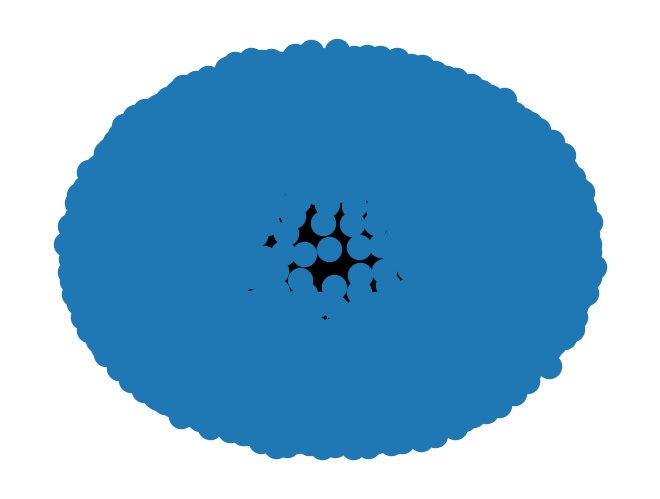

In [155]:
nx.draw(G)

# 生成随机游走节点序列的函数

In [156]:
def get_randomwalk(node, path_length):
    random_walk = [node]
    
    for i in range(path_length -1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
    
    return random_walk

In [157]:
all_nodes = list(G.nodes())

In [158]:
all_nodes

['甄嬛',
 '后宫·甄嬛传',
 '北京电视艺术中心',
 '思想性',
 '新闻事业',
 '文化需求',
 '两个文明',
 '郑晓龙',
 '渴望',
 '鲁晓威',
 '赵宝刚',
 '北京',
 '张凯丽',
 '吉林省',
 '李雪健',
 '黄梅莹',
 '瞬间',
 '孙松',
 '北京电影学院',
 '蓝天野',
 '河北',
 '刘慧芳',
 '华语',
 '宋大成',
 '王沪生',
 '大撒把',
 '夏钢',
 '我们还年轻',
 '葛优',
 '盛夏和她的未婚夫',
 '徐帆',
 '中央戏剧学院',
 '冯小刚',
 '北京人在纽约',
 '姜文',
 '河北省',
 '王姬',
 '西安',
 '刮痧',
 '梁家辉',
 '蒋雯丽',
 '中国民主促进会',
 '朱旭',
 '胆剑篇',
 '幸福像花儿一样',
 '石钟山',
 '九江市',
 '幸福像花样灿烂',
 '蓝天出版社',
 '高希希',
 '下海的日子',
 '孙俪',
 '上海市',
 '邓超',
 '辛柏青',
 '中国国家话剧院',
 '殷桃',
 '中国人民解放军国防大学军事文化学院',
 '飞天奖',
 '中国广播电影电视部',
 '金婚',
 '王宛平',
 '张国立',
 '国家一级演员',
 '白玉兰奖',
 '上海市人民政府',
 '第27届中国电视剧飞天奖',
 '中国电视艺术委员会',
 '甄嬛传',
 '吴雪岚',
 '王小平',
 '陈建斌',
 '天山区',
 '蔡少芬',
 '香港',
 '刘雪华',
 '长城电影公司',
 '李天柱',
 '吾土吾民',
 '蒋欣',
 '郑州市',
 '李东学',
 '大秦直道',
 '陶昕然',
 '暗夜心慌慌',
 '芈月传',
 '刘涛',
 '江西省',
 '方中信',
 '逃出珊瑚海',
 '黄轩',
 '北京舞蹈学院音乐剧系',
 '高云翔',
 '上海戏剧学院',
 '马苏',
 '哈尔滨市',
 '红高粱',
 '中国',
 '华夏文明',
 '诺贝尔文学奖',
 '诺贝尔奖',
 '莫言',
 '高密市',
 '红高粱家族',
 '周迅',
 '古墓荒斋',
 '朱亚文',
 '阳光雨季',
 '秦海璐',
 '京剧',
 '于荣光',
 '于鸣魁',
 '宋佳伦',
 '徐光宇

In [163]:
get_randomwalk('汉学', 3)

['汉学', '甄嬛', '电视剧']

# 生成随机游走序列

In [164]:
gamma = 10
walk_length = 5

In [166]:
from tqdm import tqdm

In [167]:
random_walks = []

for n in tqdm(all_nodes):
    for i in range(gamma):
        random_walks.append(get_randomwalk(n, walk_length))

100%|█████████████████████████████████████████████████████████████████████████████| 1262/1262 [00:01<00:00, 685.86it/s]


In [168]:
len(random_walks)

12620

# 训练Word2Vec模型

In [173]:
from gensim.models import Word2Vec

In [175]:
model = Word2Vec(
    vector_size=256,
    window=4,
    sg=1,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    seed=123
)

In [176]:
model.build_vocab(random_walks, progress_per=2)

In [179]:
model.train(random_walks, total_examples=model.corpus_count, epochs=50, report_delay=1)

(1298258, 1892500)

# 分析结果

In [180]:
model.wv.get_vector('汉学').shape

(256,)

In [181]:
model.wv.get_vector('汉学')

array([-0.19124828, -0.00641688,  0.09605286, -0.09334899,  0.01094641,
       -0.08439311, -0.03014006, -0.10758445, -0.03347362, -0.13280237,
       -0.183692  ,  0.11636595, -0.04731232,  0.20451836, -0.14055745,
       -0.03773822, -0.00567727, -0.0149636 ,  0.13655227,  0.09994958,
       -0.10941008, -0.049394  , -0.01096569, -0.04968761,  0.22091874,
        0.14825757,  0.03638006, -0.09527345,  0.05364813, -0.01923857,
       -0.2671909 ,  0.1282956 ,  0.05752391, -0.03474476,  0.05214779,
        0.00778376,  0.0199397 ,  0.08319607, -0.05682591,  0.02515742,
       -0.13372572,  0.10242543, -0.07055289, -0.05721731, -0.08649338,
       -0.14577152, -0.1915709 , -0.09303112,  0.0408154 , -0.06292174,
       -0.14709608, -0.04849333, -0.02162064, -0.0188023 , -0.03165204,
        0.17850152, -0.034747  , -0.0301836 , -0.2590264 , -0.14225464,
       -0.07760943,  0.10877298,  0.05334742,  0.1491382 , -0.02125846,
       -0.1836402 , -0.02138007,  0.06377326,  0.06264467, -0.01

In [185]:
model.wv.similar_by_vector('刘亦菲')

[('环境描写', 0.809605062007904),
 ('长白山', 0.8062098622322083),
 ('宁海强', 0.8037595748901367),
 ('浑河', 0.7992528080940247),
 ('钮祜禄·凌柱', 0.7986816763877869),
 ('皇帝', 0.7974953055381775),
 ('中华人民共和国', 0.7946723103523254),
 ('京师', 0.7933772206306458),
 ('南川', 0.7929298281669617),
 ('陶昕然', 0.7875960469245911)]

# PCA降维可视化 

In [186]:
X = model.wv.vectors

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

In [191]:
embed_2d.shape

(1262, 2)

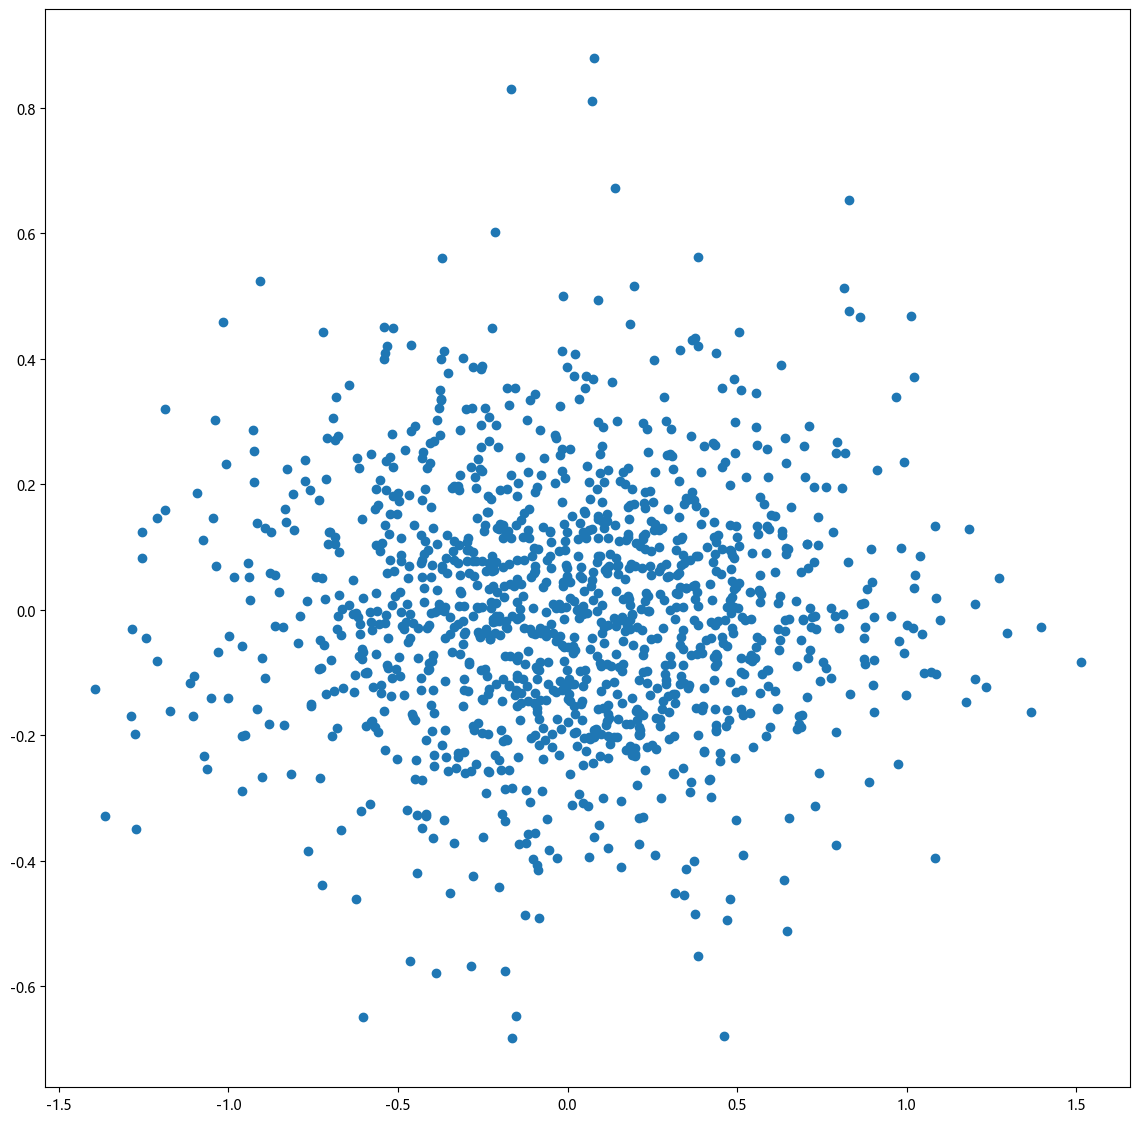

In [192]:
plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

# 可视化某个词条的二维Embeding

In [193]:
term = '刘亦菲'

In [196]:
term_256d = model.wv[term].reshape(1, -1)

In [197]:
term_256d.shape

(1, 256)

In [198]:
term_2d = pca.transform(term_256d)

In [199]:
term_2d

array([[-0.11349207,  0.11437494]], dtype=float32)

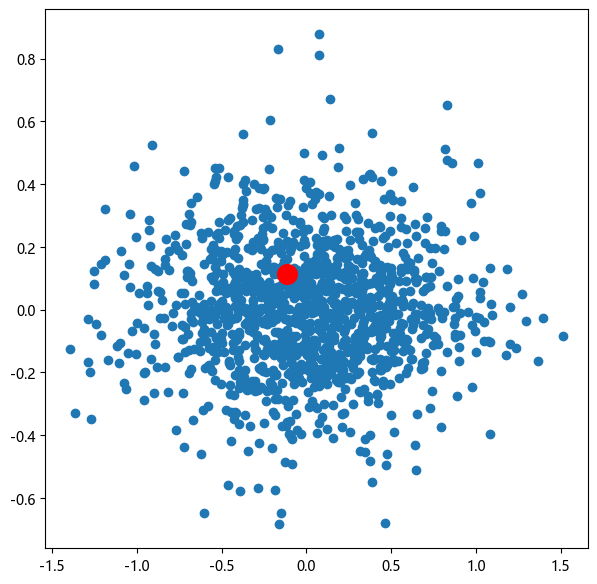

In [201]:
plt.figure(figsize=(7, 7))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.scatter(term_2d[:, 0], term_2d[:, 1], c='r', s=200)
plt.show()

# 可视化某些词条的二维Embedding

In [203]:
pagerank = nx.pagerank(G)

node_importance = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

In [205]:
n = 30
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [206]:
terms_chosen

['甄嬛',
 '后宫·甄嬛传',
 '北京电视艺术中心',
 '思想性',
 '新闻事业',
 '文化需求',
 '两个文明',
 '郑晓龙',
 '渴望',
 '鲁晓威',
 '赵宝刚',
 '北京',
 '张凯丽',
 '吉林省',
 '李雪健',
 '黄梅莹',
 '瞬间',
 '孙松',
 '北京电影学院',
 '蓝天野',
 '河北',
 '刘慧芳',
 '华语',
 '宋大成',
 '王沪生',
 '大撒把',
 '夏钢',
 '我们还年轻',
 '葛优',
 '盛夏和她的未婚夫']

In [207]:
term2index = model.wv.key_to_index

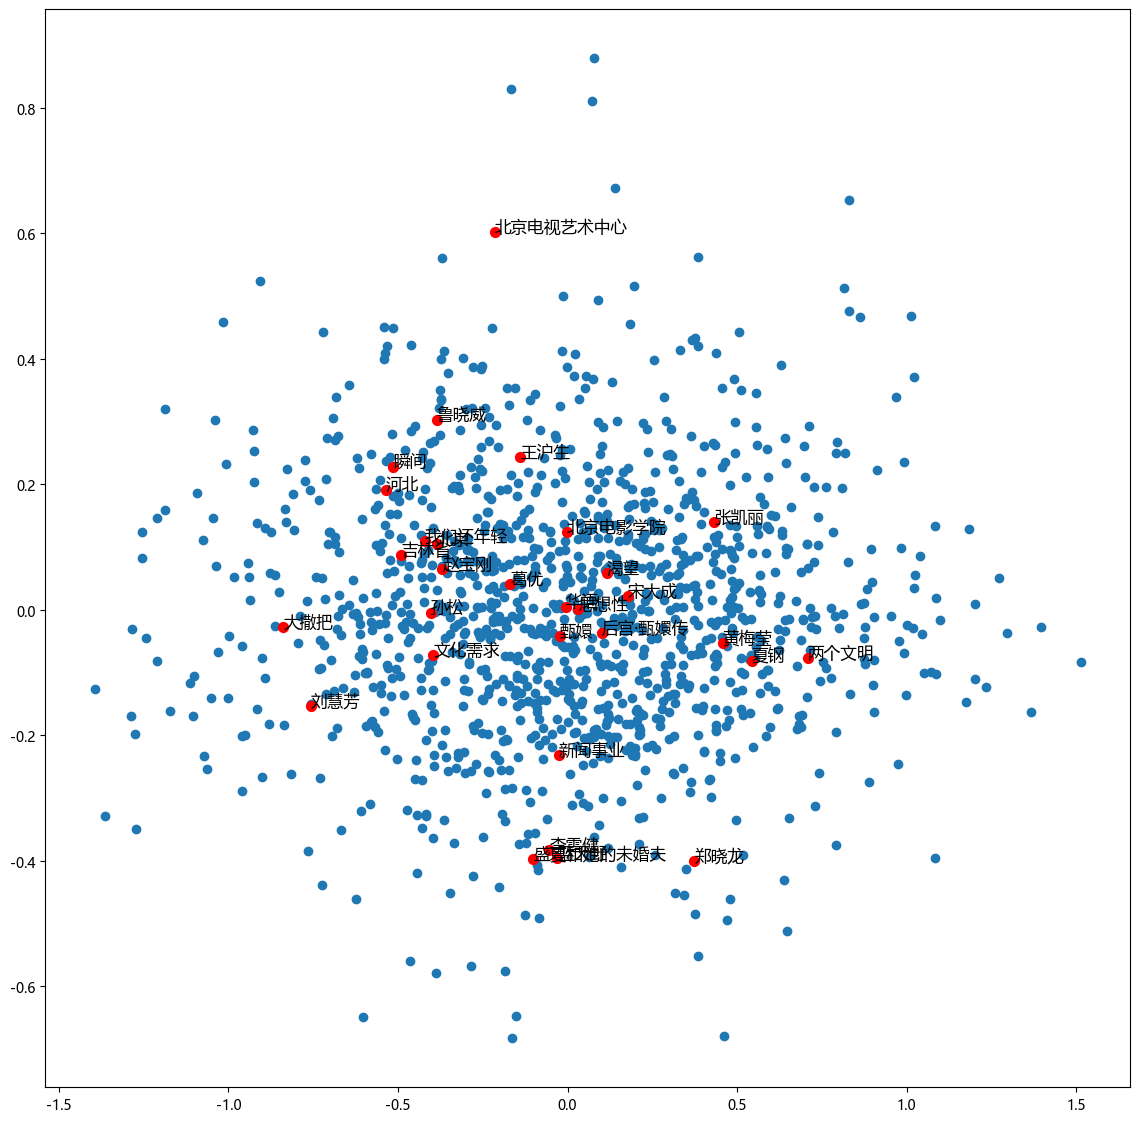

In [211]:
plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
for item in terms_chosen:
    idx=term2index[item]
    plt.scatter(embed_2d[idx, 0], embed_2d[idx, 1], c='r', s=50)
    plt.annotate(item, xy=(embed_2d[idx, 0], embed_2d[idx, 1]), c='k', fontsize=12)
plt.show()

# TSNE 降维可视化

In [212]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d=tsne.fit_transform(X)

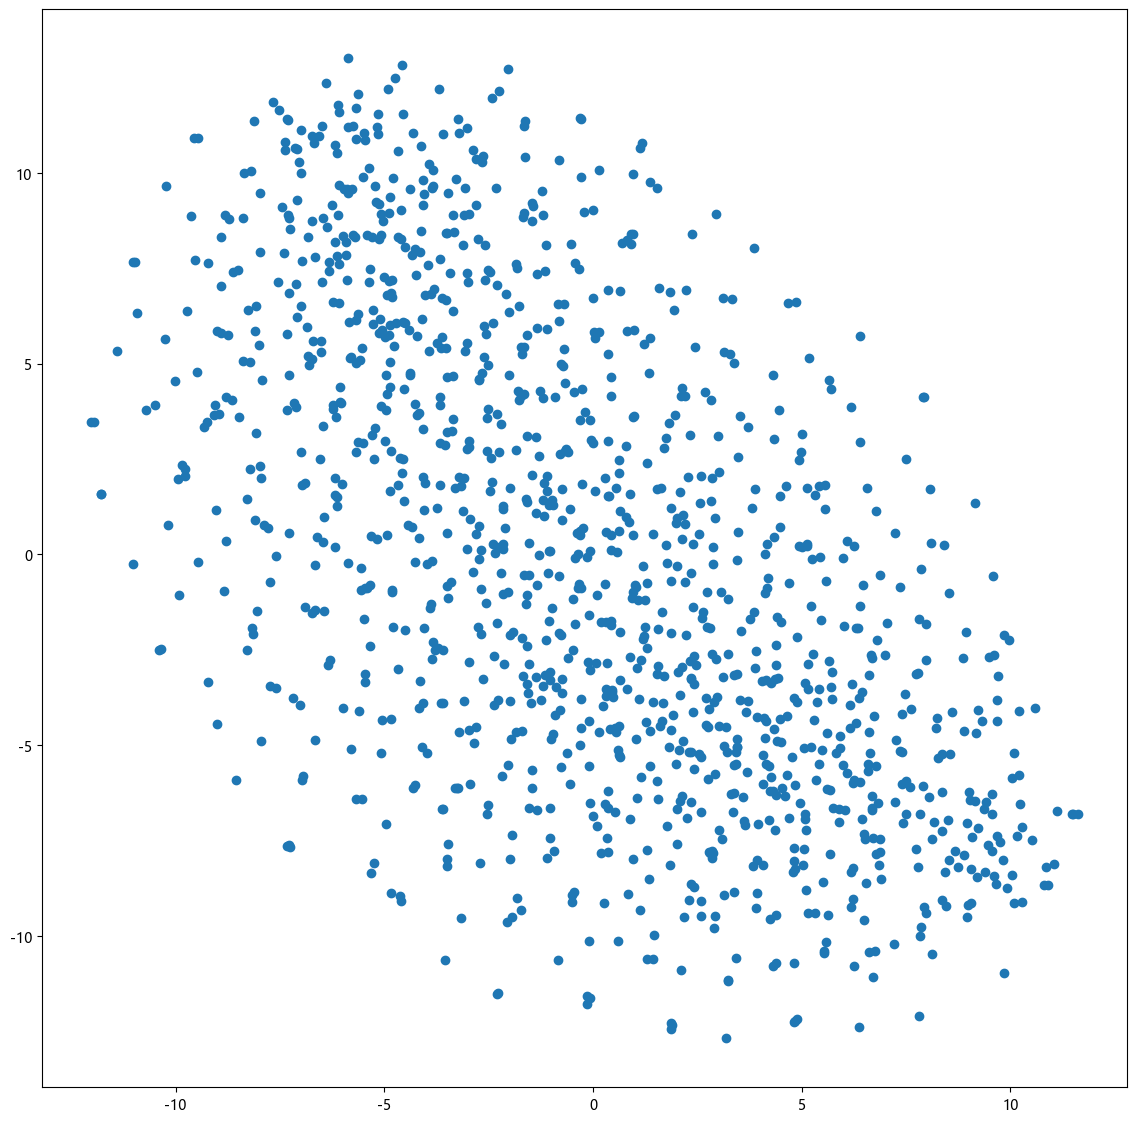

In [213]:
plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

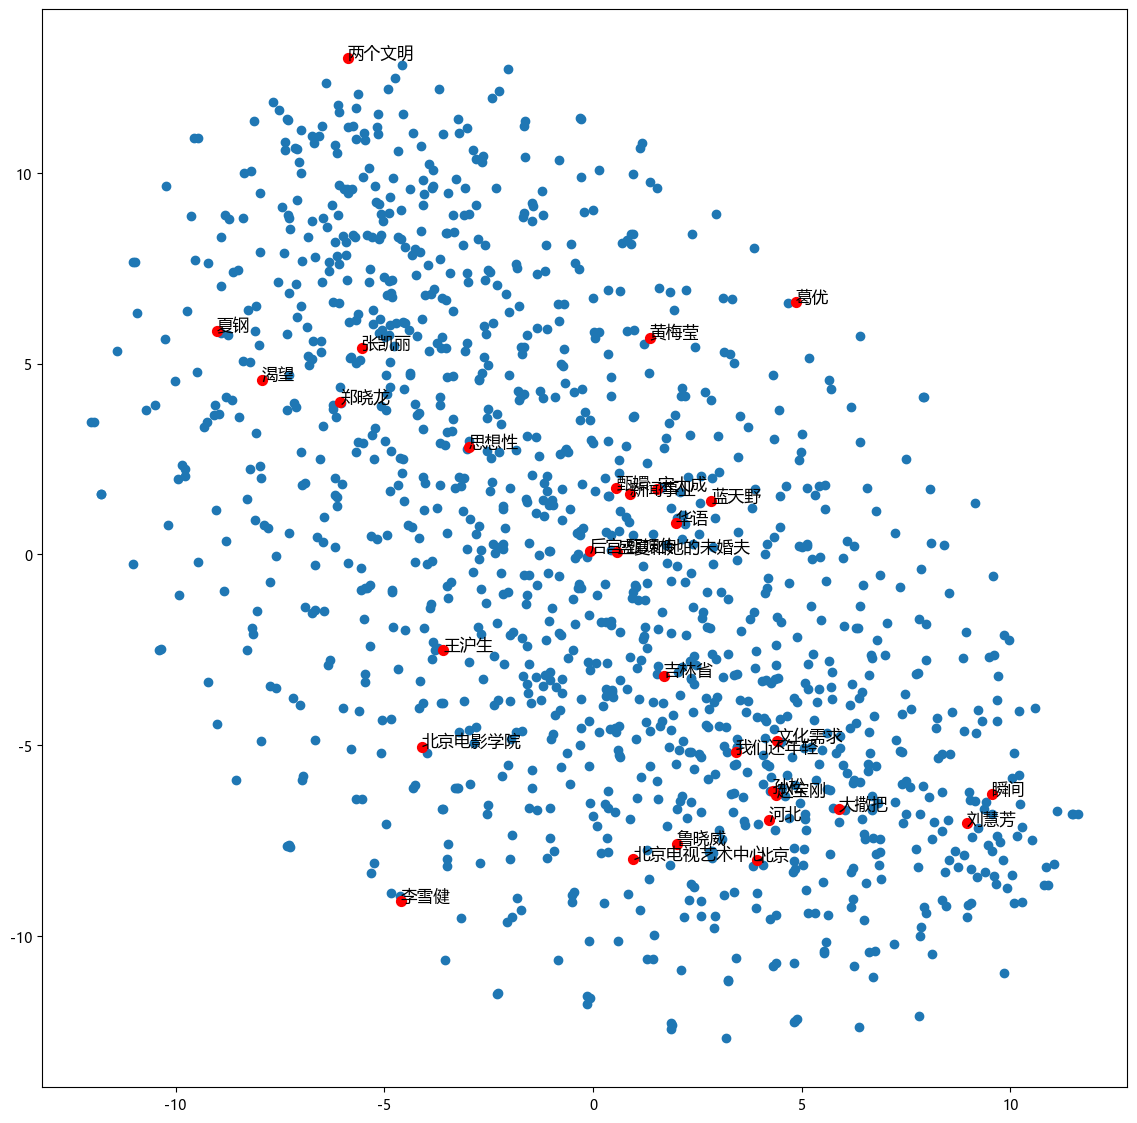

In [214]:
plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
for item in terms_chosen:
    idx=term2index[item]
    plt.scatter(embed_2d[idx, 0], embed_2d[idx, 1], c='r', s=50)
    plt.annotate(item, xy=(embed_2d[idx, 0], embed_2d[idx, 1]), c='k', fontsize=12)
plt.show()